<div style="text-align: center; padding: 40px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; border-radius: 10px;">
    <h1 style="font-size: 48px; margin-bottom: 20px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        📊 Análisis de Big Data con Apache Spark
    </h1>
    <h2 style="font-size: 32px; margin-bottom: 30px; font-weight: 300;">
        Guía de Aprendizaje Práctica
    </h2>
    <hr style="border: 2px solid white; width: 60%; margin: 30px auto;">
    <h3 style="font-size: 24px; margin-top: 30px; font-weight: 400;">
        Análisis Exploratorio de Datos con PySpark
    </h3>
    <p style="font-size: 18px; margin-top: 20px; font-style: italic;">
        Procesamiento Distribuido de Datos a Gran Escala
    </p>
    <p style="font-size: 16px; margin-top: 30px;">
        <strong>Autor:</strong> Juan Carlos González Ibarra<br>
        <strong>Correo:</strong> jcgi.laboral@gmail.com<br>
        <strong>Institución:</strong> ISU Universidad<br>
        <strong>Fecha:</strong> Enero 2026
    </p>
</div>

---

## 📋 Tabla de Contenidos

### Introducción y Configuración
1. [Objetivos de Aprendizaje](#objetivos)
2. [Prerequisitos](#prerequisitos)
3. [Conceptos Clave de Apache Spark](#conceptos)
4. [Configuración e Importación de Librerías](#seccion-1)
5. [Inicialización de Sesión Spark](#seccion-2)

### Preparación de Datos
6. [Carga de Datos](#seccion-3)
7. [Limpieza y Preparación de Datos](#seccion-4)
   - Eliminación de columnas innecesarias
   - Validación y conversión de datos
   - Integración mediante joins
   - Estrategia de caché

### Análisis Exploratorio de Datos (EDA)
8. [Análisis y Visualizaciones](#seccion-5)
   - 5.1. Distribución de productos por pedido
   - 5.2. Frecuencia de compras por día de la semana
   - 5.3. Frecuencia de compras por hora del día
   - 5.4. Los 5 productos más vendidos
   - 5.5. Producto más comprado por departamento
   - 5.6. Productos más comprados juntos (Market Basket Analysis)

### Resultados y Conclusiones
9. [Conclusiones del Análisis](#seccion-6)
10. [Limpieza y Cierre](#seccion-7)
11. [Recursos Adicionales](#recursos)

---

<a id="objetivos"></a>
## 🎯 Objetivos de Aprendizaje

Al completar este notebook, los estudiantes serán capaces de:

### Objetivos Técnicos
1. **Configurar y utilizar Apache Spark** en modo local para procesamiento de Big Data
2. **Aplicar transformaciones y acciones** de PySpark para manipular grandes volúmenes de datos
3. **Implementar operaciones de agregación** usando GroupBy y funciones de ventana (Window Functions)
4. **Optimizar el rendimiento** mediante estrategias de caché y particionamiento
5. **Realizar joins** entre múltiples DataFrames de forma eficiente
6. **Convertir entre Spark y Pandas** DataFrames según las necesidades del análisis

### Objetivos de Análisis de Datos
7. **Realizar análisis exploratorio de datos (EDA)** para descubrir patrones y tendencias
8. **Identificar insights de negocio** a partir de datos transaccionales
9. **Aplicar técnicas de Market Basket Analysis** para encontrar asociaciones de productos
10. **Visualizar resultados** usando matplotlib y networkx
11. **Interpretar métricas** de comportamiento de clientes y productos

### Competencias de Big Data
12. **Comprender la arquitectura** de Apache Spark (Driver, Executors, DAG)
13. **Diferenciar entre transformaciones lazy y acciones eager**
14. **Aplicar buenas prácticas** de procesamiento distribuido
15. **Evaluar cuándo usar Spark vs Pandas** según el volumen de datos

---

<a id="prerequisitos"></a>
## 📚 Prerequisitos

### Conocimientos Previos Requeridos

#### Nivel Básico (Esencial)
- ✅ **Python**: Sintaxis básica, estructuras de datos (listas, diccionarios), funciones
- ✅ **Pandas**: Lectura de datos, operaciones básicas con DataFrames
- ✅ **SQL**: Conceptos de SELECT, WHERE, GROUP BY, JOIN
- ✅ **Análisis de Datos**: Estadística descriptiva, interpretación de gráficos

#### Nivel Intermedio (Recomendado)
- 🔶 **Programación funcional**: map, filter, lambda functions
- 🔶 **Visualización de datos**: matplotlib o seaborn
- 🔶 **Jupyter Notebooks**: Manejo de celdas, markdown

#### Nivel Avanzado (Opcional pero útil)
- 🔹 **Sistemas distribuidos**: Conceptos de paralelización
- 🔹 **Optimización de código**: Complejidad algorítmica
- 🔹 **Big Data**: Conceptos de las 3 V's (Volumen, Velocidad, Variedad)

### Software Requerido

```bash
# Python 3.8+
python --version

# PySpark
pip install pyspark==3.5.0

# Bibliotecas de análisis
pip install pandas matplotlib networkx

# Jupyter (si no está instalado)
pip install jupyter notebook
```

### Recursos del Dataset

**Dataset**: Instacart Market Basket Analysis
- **Tamaño**: ~32 millones de registros
- **Formato**: CSV files
- **Archivos**:
  - `orders.csv` (~3.4M registros)
  - `order_products__prior.csv` (~32M registros)
  - `products.csv` (~50K registros)
  - `departments.csv` (21 registros)

**Fuente**: Instacart Kaggle Competition (datos públicos anonimizados)

---

## 🔥 ¿Qué es Apache Spark y PySpark?

### Apache Spark: El Motor de Big Data

**Apache Spark** es un motor de procesamiento de datos distribuido y de código abierto, diseñado específicamente para el análisis de Big Data. Desarrollado originalmente en UC Berkeley en 2009, Spark se ha convertido en el estándar de facto para procesamiento de grandes volúmenes de datos.

#### Características Principales

- **⚡ Velocidad**: Hasta 100x más rápido que Hadoop MapReduce debido al procesamiento en memoria (in-memory computing)
- **🔄 Versatilidad**: Soporta múltiples workloads: batch processing, streaming, machine learning, graph processing
- **📊 Facilidad de uso**: APIs en Scala, Java, Python, R y SQL
- **🌐 Escalabilidad**: Desde laptops hasta clusters de miles de nodos
- **🔗 Integración**: Compatible con Hadoop, Kubernetes, Mesos, y fuentes de datos como HDFS, S3, Cassandra, HBase

### PySpark: Spark para Python

**PySpark** es la API de Python para Apache Spark. Permite a los desarrolladores de Python aprovechar el poder de Spark usando sintaxis familiar de Python.

```python
# Ejemplo básico de PySpark
from pyspark.sql import SparkSession

# Crear sesión Spark
spark = SparkSession.builder.appName("MiApp").getOrCreate()

# Leer datos
df = spark.read.csv("datos.csv", header=True, inferSchema=True)

# Procesar datos distribuidos
resultado = df.groupBy("categoria").count()
```

#### Ventajas de PySpark

- ✅ **Sintaxis Pythonica**: Familiar para data scientists
- ✅ **Interoperabilidad**: Se integra con pandas, NumPy, scikit-learn
- ✅ **Bibliotecas ML**: MLlib para machine learning distribuido
- ✅ **Notebooks**: Soporte nativo en Jupyter
- ✅ **Comunidad**: Gran ecosistema y documentación

### ¿Cuándo usar Spark/PySpark?

#### ✅ USA SPARK cuando:
- Datos > 100GB que no caben en memoria
- Necesitas procesamiento paralelo distribuido
- Análisis en tiempo real (Spark Streaming)
- Machine Learning a gran escala
- ETL complejos con múltiples transformaciones

#### ❌ NO uses Spark cuando:
- Datos < 10GB (Pandas es suficiente y más simple)
- Análisis exploratorio rápido en laptop
- Prototipado rápido
- No tienes infraestructura distribuida

---

## 🏗️ Arquitectura de Apache Spark

### Modelo de Arquitectura Master-Worker

Spark utiliza una arquitectura **master-worker (maestro-trabajador)** donde un nodo coordinador distribuye el trabajo a múltiples nodos ejecutores.

```
┌────────────────────────────────────────────────────────────────┐
│                     CLUSTER MANAGER                             │
│              (YARN / Mesos / Kubernetes / Standalone)          │
└────────────────────────────────────┬───────────────────────────┘
                                     │
        ┌────────────────────────────┼────────────────────────────┐
        │                            │                            │
┌───────▼────────┐          ┌────────▼────────┐         ┌────────▼────────┐
│  DRIVER NODE   │          │  WORKER NODE 1  │         │  WORKER NODE 2  │
│                │          │                 │         │                 │
│  ┌──────────┐ │          │  ┌───────────┐  │         │  ┌───────────┐  │
│  │  Driver  │ │          │  │ Executor  │  │         │  │ Executor  │  │
│  │ Program  │ │          │  │           │  │         │  │           │  │
│  └────┬─────┘ │          │  │  ┌─────┐  │  │         │  │  ┌─────┐  │  │
│       │       │          │  │  │Task │  │  │         │  │  │Task │  │  │
│  ┌────▼────┐  │          │  │  │ 1   │  │  │         │  │  │ 3   │  │  │
│  │ Spark   │  │          │  │  └─────┘  │  │         │  │  └─────┘  │  │
│  │ Context │──┼─────────►│  │  ┌─────┐  │  │         │  │  ┌─────┐  │  │
│  │  (SC)   │  │          │  │  │Task │  │  │         │  │  │Task │  │  │
│  └─────────┘  │          │  │  │ 2   │  │  │         │  │  │ 4   │  │  │
│               │          │  │  └─────┘  │  │         │  │  └─────┘  │  │
│  SparkSession │          │  └───────────┘  │         │  └───────────┘  │
│               │          │                 │         │                 │
└───────────────┘          │  Cache/Storage  │         │  Cache/Storage  │
                           └─────────────────┘         └─────────────────┘
```

### Componentes de la Arquitectura

#### 1. **Driver Program (Programa Controlador)**
- **Función**: Cerebro de la aplicación Spark
- **Responsabilidades**:
  - Ejecuta el código principal (función `main()`)
  - Crea el `SparkContext`
  - Convierte el programa en un DAG (Directed Acyclic Graph)
  - Programa la ejecución de tareas
  - Coordina los Executors

```python
# El driver es donde corre este código
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MiApp").getOrCreate()
# Todo lo que escribes aquí corre en el driver
```

#### 2. **SparkContext (Contexto de Spark)**
- Punto de conexión con el cluster
- Coordina la ejecución del trabajo
- Distribuye datos y código a los workers
- En Spark 2.0+, encapsulado en `SparkSession`

#### 3. **Cluster Manager (Gestor de Cluster)**
Administra los recursos del cluster. Opciones:
- **Standalone**: Modo simple incluido con Spark
- **Apache YARN**: Gestor de Hadoop
- **Apache Mesos**: Gestor genérico de recursos
- **Kubernetes**: Orquestador de contenedores

#### 4. **Worker Nodes (Nodos Trabajadores)**
- Máquinas físicas/virtuales que ejecutan el trabajo
- Contienen uno o más Executors
- Cada worker puede tener múltiples cores/memoria

#### 5. **Executors (Ejecutores)**
- **Función**: Procesos JVM que ejecutan las tareas
- **Características**:
  - Uno por worker node (o más si se configura)
  - Ejecutan código en paralelo
  - Almacenan datos en caché/memoria
  - Reportan estado al Driver
  
```python
# Configuración de executors
spark = SparkSession.builder \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "4") \
    .getOrCreate()
```

#### 6. **Tasks (Tareas)**
- Unidad más pequeña de trabajo
- Ejecutadas por threads en los Executors
- Procesan una partición de datos

---

### Flujo de Ejecución en Spark

```
1. Driver crea SparkContext
         ↓
2. SparkContext conecta con Cluster Manager
         ↓
3. Cluster Manager asigna recursos (Executors en Workers)
         ↓
4. Driver envía código de la aplicación a Executors
         ↓
5. Driver envía Tasks a Executors basado en el DAG
         ↓
6. Executors ejecutan Tasks y almacenan resultados
         ↓
7. Executors reportan progreso al Driver
         ↓
8. Driver coordina y consolida resultados finales
```

---

## 📦 Modelo de Datos en Spark

### RDD (Resilient Distributed Dataset)

**RDD** es la abstracción fundamental de Spark: una colección distribuida e inmutable de objetos que puede ser procesada en paralelo.

#### Características de RDD

```python
# Crear RDD desde una lista
rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5])

# Transformaciones (lazy)
rdd_squared = rdd.map(lambda x: x ** 2)

# Acciones (eager - ejecutan el DAG)
result = rdd_squared.collect()  # [1, 4, 9, 16, 25]
```

**Propiedades clave**:
- **Resilient (Resiliente)**: Se puede reconstruir si se pierde (mediante lineage)
- **Distributed (Distribuido)**: Particionado a través de múltiples nodos
- **Dataset**: Colección de datos

#### RDD vs DataFrames

| Característica | RDD | DataFrame |
|---------------|-----|-----------|
| **Nivel de abstracción** | Bajo nivel | Alto nivel |
| **Optimización** | Manual | Automática (Catalyst) |
| **Tipo de datos** | Cualquier objeto Python/Java/Scala | Esquema estructurado (como tabla SQL) |
| **Performance** | Menor | Mayor (optimización Tungsten) |
| **Uso recomendado** | Control fino, datos no estructurados | Datos estructurados, análisis SQL |

### DataFrames y Datasets

#### DataFrames en PySpark

Un **DataFrame** es una colección distribuida de datos organizados en **columnas nombradas**, similar a una tabla SQL o un DataFrame de pandas.

```python
# Crear DataFrame
from pyspark.sql import Row

data = [
    Row(nombre="Ana", edad=25, ciudad="Madrid"),
    Row(nombre="Luis", edad=30, ciudad="Barcelona"),
    Row(nombre="María", edad=28, ciudad="Valencia")
]

df = spark.createDataFrame(data)

# Operaciones tipo SQL
df.select("nombre", "edad").show()
df.filter(df.edad > 26).show()
df.groupBy("ciudad").count().show()
```

#### Ventajas de DataFrames

- ✅ **Optimización automática**: Catalyst Optimizer mejora las queries
- ✅ **Sintaxis declarativa**: Similar a SQL y pandas
- ✅ **Schema inferido**: Tipos de datos automáticos
- ✅ **Compatibilidad**: Lee múltiples formatos (CSV, JSON, Parquet, etc.)

### Particionamiento de Datos

Los datos en Spark se dividen en **particiones** que se distribuyen entre los workers.

```
┌─────────────────────────────────────────────────────────────┐
│                    DataFrame Completo                        │
│                   (1 millón de registros)                    │
└───────┬─────────────────┬─────────────────┬────────────────┘
        │                 │                 │
   ┌────▼──────┐    ┌─────▼──────┐   ┌─────▼──────┐
   │Partición 1│    │Partición 2 │   │Partición 3 │
   │(~333K)    │    │(~333K)     │   │(~334K)     │
   └───────────┘    └────────────┘   └────────────┘
        │                 │                 │
   ┌────▼──────┐    ┌─────▼──────┐   ┌─────▼──────┐
   │Worker 1   │    │Worker 2    │   │Worker 3    │
   │Executor   │    │Executor    │   │Executor    │
   └───────────┘    └────────────┘   └────────────┘
```

**Control de particiones**:
```python
# Reparticionar datos
df_repartitioned = df.repartition(10)  # 10 particiones

# Coalesce (reducir sin shuffle)
df_coalesced = df.coalesce(5)  # 5 particiones

# Ver número de particiones
print(df.rdd.getNumPartitions())
```

---

### Procesamiento Lazy (Evaluación Perezosa)

Spark usa **evaluación perezosa**: las transformaciones no se ejecutan inmediatamente.

```python
# TRANSFORMACIONES (lazy) - solo definen el plan
df1 = df.filter(df.edad > 25)  # No se ejecuta aún
df2 = df1.select("nombre")     # No se ejecuta aún
df3 = df2.distinct()            # No se ejecuta aún

# ACCIÓN (eager) - dispara la ejecución del DAG completo
result = df3.collect()  # ¡AHORA se ejecuta todo!
```

#### Transformaciones vs Acciones

| Transformaciones (Lazy) | Acciones (Eager) |
|-------------------------|------------------|
| `map()`, `filter()` | `collect()`, `count()` |
| `select()`, `where()` | `show()`, `take()` |
| `groupBy()`, `join()` | `save()`, `write()` |
| `orderBy()`, `distinct()` | `foreach()`, `reduce()` |

**Ventajas de Lazy Evaluation**:
- 🎯 Optimización: Spark puede reorganizar operaciones
- 💾 Eficiencia: Evita cálculos innecesarios
- ⚡ Pipelining: Combina múltiples operaciones

---

## ⚙️ Implementación de Big Data con Spark

### Las 3 V's de Big Data y Spark

Spark está diseñado específicamente para manejar los desafíos del Big Data:

#### 1. **Volumen** (Volume)
Spark distribuye datos masivos a través de clusters:

```python
# Spark puede procesar terabytes de datos
df = spark.read.parquet("s3://mi-bucket/datos-terabytes/")

# Procesamiento distribuido automático
resultado = df.groupBy("categoria").agg(
    count("*").alias("total"),
    avg("precio").alias("precio_promedio")
)
```

**Estrategias de Spark para Volumen**:
- Particionamiento inteligente de datos
- Procesamiento en memoria distribuida
- Spillover a disco cuando la RAM se agota

#### 2. **Velocidad** (Velocity)
Spark procesa streams de datos en tiempo real:

```python
from pyspark.sql import SparkSession
from pyspark.streaming import StreamingContext

# Spark Structured Streaming
df_stream = spark.readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "localhost:9092") \
    .option("subscribe", "topic-ventas") \
    .load()

# Procesamiento en tiempo real
df_stream.writeStream \
    .format("console") \
    .start()
```

**Capacidades de velocidad**:
- Micro-batch processing (sub-segundo)
- Event-time processing
- Late data handling

#### 3. **Variedad** (Variety)
Spark lee múltiples formatos de datos:

```python
# Datos estructurados
df_csv = spark.read.csv("datos.csv", header=True)
df_parquet = spark.read.parquet("datos.parquet")

# Datos semi-estructurados
df_json = spark.read.json("datos.json")
df_xml = spark.read.format("xml").load("datos.xml")

# Bases de datos
df_jdbc = spark.read.jdbc(
    url="jdbc:postgresql://localhost/db",
    table="ventas",
    properties={"user": "admin", "password": "pass"}
)

# Data Lakes
df_s3 = spark.read.parquet("s3a://my-bucket/data/")
```

---

### Ecosistema Spark para Big Data

```
┌─────────────────────────────────────────────────────────────┐
│                    SPARK CORE ENGINE                        │
│            (Scheduling, Memory, Task Distribution)          │
└─────────────────────────────────────────────────────────────┘
           │                │                │
    ┌──────▼──────┐  ┌──────▼──────┐  ┌────▼────────┐
    │ Spark SQL   │  │  Spark      │  │   Spark     │
    │             │  │  Streaming  │  │   MLlib     │
    │ DataFrames  │  │             │  │  (Machine   │
    │ Catalyst    │  │ Real-time   │  │  Learning)  │
    └─────────────┘  └─────────────┘  └─────────────┘
           │                │                │
    ┌──────▼────────────────▼────────────────▼──────┐
    │             GraphX (Graph Processing)         │
    └───────────────────────────────────────────────┘
```

#### Componentes del Ecosistema

1. **Spark SQL**: Procesamiento de datos estructurados
   - Queries SQL en DataFrames
   - Catalyst Optimizer para optimización automática
   - Compatible con Hive

2. **Spark Streaming**: Procesamiento en tiempo real
   - Micro-batches de datos
   - Integración con Kafka, Flume, Kinesis
   - Structured Streaming API

3. **MLlib**: Machine Learning distribuido
   - Algoritmos de clasificación, regresión, clustering
   - Pipelines de ML
   - Feature engineering distribuido

4. **GraphX**: Procesamiento de grafos
   - Análisis de redes sociales
   - PageRank, componentes conectados
   - Algoritmos de grafos a escala

---

### Optimización y Performance en Big Data

#### 1. **Catalyst Optimizer**

Spark SQL usa el **Catalyst Optimizer** para optimizar automáticamente las queries:

```python
# Query original
df.filter(df.edad > 25) \
  .select("nombre", "edad") \
  .groupBy("edad").count()

# Catalyst puede reordenar operaciones:
# 1. Pushdown del filtro (antes del select)
# 2. Predicate pushdown a la fuente de datos
# 3. Columnar pruning (solo leer columnas necesarias)
```

**Optimizaciones de Catalyst**:
- Predicate pushdown
- Projection pushdown
- Constant folding
- Join reordering

#### 2. **Tungsten Engine**

Motor de ejecución de bajo nivel que mejora la eficiencia de CPU y memoria:

- **Code generation**: Genera bytecode Java optimizado
- **Memory management**: Gestión manual de memoria (fuera del heap de JVM)
- **Cache-aware computation**: Aprovecha la CPU cache
- **Binary processing**: Procesa datos en formato binario

#### 3. **Broadcast Variables**

Para joins con tablas pequeñas, Spark puede "broadcast" la tabla pequeña a todos los workers:

```python
from pyspark.sql.functions import broadcast

# Tabla pequeña (< 10MB)
df_small = spark.read.csv("categorias.csv")

# Tabla grande
df_large = spark.read.csv("ventas.csv")

# Broadcast join (evita shuffle)
result = df_large.join(broadcast(df_small), "categoria_id")
```

**Ventajas**:
- ❌ No shuffle de datos
- ⚡ Join extremadamente rápido
- 💾 Copia una vez, usa muchas veces

#### 4. **Particionamiento Estratégico**

```python
# Reparticionar por clave antes de join
df1_partitioned = df1.repartition("user_id")
df2_partitioned = df2.repartition("user_id")

# Join más eficiente (los datos con misma clave ya están en el mismo nodo)
result = df1_partitioned.join(df2_partitioned, "user_id")
```

#### 5. **Caching y Persistencia**

```python
# Cachear DataFrame usado múltiples veces
df_cached = df.filter(df.precio > 100).cache()

# Primera acción: calcula y cachea
count1 = df_cached.count()

# Segunda acción: usa el cache (no recalcula)
count2 = df_cached.filter(df_cached.categoria == "Electronics").count()

# Niveles de persistencia
df.persist(StorageLevel.MEMORY_AND_DISK)
df.persist(StorageLevel.MEMORY_ONLY)
df.persist(StorageLevel.DISK_ONLY)
```

---

### Casos de Uso de Spark en Big Data

#### 1. **ETL a Gran Escala**
```python
# Leer de múltiples fuentes
df_raw = spark.read.json("s3://raw-data/")

# Transformar
df_clean = df_raw \
    .filter(df_raw.status == "valid") \
    .withColumn("date", to_date("timestamp")) \
    .dropDuplicates()

# Cargar a data warehouse
df_clean.write.parquet("s3://processed-data/")
```

#### 2. **Análisis de Logs**
```python
# Procesar logs de servidores (terabytes)
logs = spark.read.text("hdfs://logs/")

# Extraer información con regex
from pyspark.sql.functions import regexp_extract

df_errors = logs.select(
    regexp_extract("value", r"ERROR: (.*)", 1).alias("error_msg")
).groupBy("error_msg").count()
```

#### 3. **Agregaciones Complejas**
```python
# Window functions para análisis temporal
from pyspark.sql.window import Window
from pyspark.sql.functions import lag, lead, row_number

window_spec = Window.partitionBy("user_id").orderBy("timestamp")

df_with_prev = df.withColumn(
    "prev_purchase", 
    lag("product_id").over(window_spec)
)
```

#### 4. **Machine Learning Distribuido**
```python
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier

# Pipeline de ML en millones de registros
assembler = VectorAssembler(
    inputCols=["feature1", "feature2", "feature3"],
    outputCol="features"
)

rf = RandomForestClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[assembler, rf])
model = pipeline.fit(df_train)
```

---

### Spark vs Tecnologías Tradicionales

| Aspecto | Hadoop MapReduce | Pandas | Spark |
|---------|------------------|--------|-------|
| **Velocidad** | Lento (disco) | Rápido (memoria) | Muy rápido (memoria + dist.) |
| **Escalabilidad** | Alta | Baja (una máquina) | Alta (cluster) |
| **Facilidad** | Complejo | Muy fácil | Moderado |
| **Volumen datos** | Terabytes+ | < 10GB | Terabytes+ |
| **Latencia** | Alta (batch) | Baja | Baja (batch + streaming) |
| **Casos de uso** | ETL batch | Análisis exploratorio | Big Data general |

---

### 💡 Mejores Prácticas en Big Data con Spark

1. ✅ **Usar DataFrames sobre RDDs** (mejor performance)
2. ✅ **Evitar `.collect()` en datos grandes** (trae todo al driver)
3. ✅ **Cachear DataFrames reutilizados** con `.cache()`
4. ✅ **Particionar estratégicamente** antes de joins
5. ✅ **Usar broadcast para tablas pequeñas** (< 10MB)
6. ✅ **Monitorear Spark UI** para detectar cuellos de botella
7. ✅ **Usar formatos columnar** (Parquet, ORC) para mejor compresión
8. ✅ **Ajustar memoria de executors** según los datos
9. ✅ **Evitar UDFs en Python** cuando sea posible (usar funciones built-in)
10. ✅ **Repartition vs Coalesce**: `repartition()` para aumentar particiones, `coalesce()` para reducir

---

[⬆️ Volver al índice](#tabla-de-contenidos)

### Ventajas de Spark

✅ **Velocidad**: Procesamiento en memoria  
✅ **Facilidad**: APIs en Python, Scala, Java, R, SQL  
✅ **Escalabilidad**: De laptop a clusters de miles de nodos  
✅ **Versatilidad**: Batch processing, streaming, ML, grafos  
✅ **Tolerancia a fallos**: Recuperación automática de fallos  

### Cuándo Usar Spark vs Pandas

| Criterio | Pandas | Spark |
|----------|--------|-------|
| **Tamaño de datos** | < 10 GB | > 10 GB |
| **Memoria disponible** | Cabe en RAM | No cabe en RAM |
| **Procesamiento** | Single-core | Multi-core/cluster |
| **Velocidad de desarrollo** | Rápido | Medio |
| **Curva de aprendizaje** | Baja | Media-Alta |
| **Ecosistema ML** | scikit-learn | MLlib, integración |

---

### 📖 Lecturas Recomendadas

- [Spark Documentation](https://spark.apache.org/docs/latest/)
- [PySpark API Reference](https://spark.apache.org/docs/latest/api/python/)
- [Databricks Learning Academy](https://www.databricks.com/learn)

---

<a id="seccion-1"></a>
# Utilizar Spark para realizar un análisis de los datos en paralelo

## 🚀 Introducción al Proyecto

Este notebook es una **guía práctica de aprendizaje** diseñada para enseñar el uso de Apache Spark en el análisis de datos a gran escala. Trabajaremos con datos reales de Instacart (plataforma de compras en línea) para descubrir patrones de comportamiento de clientes y productos.

### Contexto del Proyecto

**Escenario**: Una empresa de comercio electrónico necesita analizar millones de transacciones para:
- Entender patrones de compra de sus clientes
- Optimizar inventario y logística
- Mejorar recomendaciones de productos
- Identificar oportunidades de cross-selling

**Desafío**: Los datos son demasiado grandes para procesarse con herramientas tradicionales como Pandas o Excel.

**Solución**: Apache Spark - procesamiento distribuido y paralelo de Big Data.

---

[⬆️ Volver al índice](#tabla-de-contenidos)

## 1. Configuración e Importación de Librerías

Importamos las librerías necesarias para el análisis de datos con PySpark y visualización.

In [84]:
"""
IMPORTACIÓN DE BIBLIOTECAS PARA ANÁLISIS CON PYSPARK

PySpark SQL:
- SparkSession: Punto de entrada principal para trabajar con Spark DataFrame API
- desc, col, when, count: Funciones para manipular y operar sobre columnas
- Window: Define particiones para funciones de ventana (análisis por grupos)
- row_number: Asigna números secuenciales dentro de cada partición

Visualización y Análisis:
- matplotlib.pyplot: Creación de gráficos estadísticos
- networkx: Análisis y visualización de redes/grafos
- itertools.combinations: Generación de combinaciones para market basket analysis
- collections.Counter: Conteo eficiente de frecuencias
"""

from pyspark.sql import SparkSession
from pyspark.sql.functions import desc, col, when, count as spark_count
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from collections import Counter

# Configurar matplotlib para mejor visualización
%matplotlib inline
plt.style.use('default')

<a id="seccion-2"></a>
## 2. Inicialización de Sesión Spark

### 🎓 Concepto Educativo: SparkSession

**SparkSession** es el punto de entrada unificado para todas las funcionalidades de Spark. Reemplaza los antiguos SQLContext y HiveContext.

Creamos una sesión Spark local con configuración optimizada de memoria:
- **Driver memory**: 4GB - Memoria para el proceso coordinador
- **Executor memory**: 4GB - Memoria para procesos de trabajo
- **Shuffle partitions**: 32 (optimizado para datasets medianos)
- **Memory fraction**: 80% para ejecución/almacenamiento

### 💻 Ejercicio Práctico

Experimenta modificando estos parámetros:
- ¿Qué pasa si reduces `spark.driver.memory` a 2GB?
- ¿Cómo afecta cambiar `shuffle.partitions` a 16 o 64?

---

[⬆️ Volver al índice](#tabla-de-contenidos)

In [85]:
"""
FUNCIÓN PARA CONSTRUIR SESIÓN SPARK OPTIMIZADA

Configuración aplicada:
- master("local[*]"): Usa todos los cores disponibles del CPU
- driver.memory: 4GB para el proceso coordinador (driver)
- executor.memory: 4GB para procesos de trabajo (executors)
- shuffle.partitions: 32 particiones para operaciones de redistribución
- memory.fraction: 0.8 (80%) del heap para ejecución y almacenamiento
- storageFraction: 0.3 (30%) del memory.fraction para cache

Esta función cierra sesiones previas para evitar conflictos de recursos.
"""

def build_local_spark(app_name: str = "Analisis_Pedidos") -> SparkSession:
    """Crea una sesión Spark en modo local con configuración optimizada."""
    try:
        # Cierra sesiones previas si las hay
        spark = SparkSession.getActiveSession()
        if spark is not None:
            spark.stop()
    except Exception:
        pass

    return (
        SparkSession.builder
        .appName(app_name)
        .master("local[*]")
        .config("spark.driver.memory", "4g")
        .config("spark.executor.memory", "4g")
        .config("spark.sql.shuffle.partitions", "32")
        .config("spark.memory.fraction", "0.8")
        .config("spark.memory.storageFraction", "0.3")
        .getOrCreate()
    )

# Inicializar la sesión de Spark
spark = build_local_spark()
print(f"✓ Sesión Spark iniciada: {spark.sparkContext.appName}")
print(f"✓ Versión Spark: {spark.version}")

✓ Sesión Spark iniciada: Analisis_Pedidos
✓ Versión Spark: 4.1.1


<a id="seccion-3"></a>
## 3. Carga de Datos desde CSV

### 📚 Concepto: Lectura de Datos en Spark

Spark proporciona una API **DataFrameReader** que soporta múltiples formatos de datos:
- CSV, JSON, Parquet, ORC, Avro, JDBC, etc.

**Opciones importantes al leer CSV**:
- `header=True`: La primera fila contiene nombres de columnas
- `inferSchema=True`: Spark deduce automáticamente los tipos de datos
- ⚠️ **Nota**: `inferSchema` requiere dos pasadas sobre los datos (puede ser lento en archivos grandes)

### 🔍 Alternativa Profesional

En entornos de producción, es mejor especificar el schema explícitamente:
```python
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

schema = StructType([
    StructField("order_id", IntegerType(), True),
    StructField("user_id", IntegerType(), True),
    StructField("order_number", IntegerType(), True),
    # ... más campos
])

df = spark.read.schema(schema).csv("orders.csv", header=True)
```

**Ventajas**: 
- ✅ Más rápido (una sola pasada)
- ✅ Evita errores de inferencia
- ✅ Documentación clara del schema
- ✅ Control total sobre tipos de datos

### 💡 Buenas Prácticas

1. Usar `option("mode", "DROPMALFORMED")` para ignorar registros malformados
2. Especificar `option("encoding", "UTF-8")` para caracteres especiales
3. Usar `option("nullValue", "NA")` para valores nulos personalizados

---

[⬆️ Volver al índice](#tabla-de-contenidos)

<a id="seccion-4"></a>
## 4. Limpieza de Datos

### 🧹 Concepto: Data Cleaning en Big Data

La limpieza de datos es crucial en Big Data porque:
1. **Calidad vs Cantidad**: Datos malos en volumen = decisiones erróneas
2. **Costo computacional**: Procesar datos inválidos desperdicia recursos
3. **Resultados confiables**: Garbage in, garbage out

### 📊 Estrategias de Limpieza

En este análisis aplicamos:
- **Eliminación de nulos**: `dropna()` para valores faltantes críticos
- **Eliminación de duplicados**: `dropDuplicates()` por columnas clave
- **Validación de integridad**: Verificar valores válidos en columnas

### ⚙️ Comparación: Spark vs Pandas

| Operación | Pandas | Spark |
|-----------|--------|-------|
| Drop nulls | `df.dropna()` | `df.dropna()` |
| Drop duplicates | `df.drop_duplicates()` | `df.dropDuplicates()` |
| Ejecución | Inmediata | Lazy (al usar `count()` o `show()`) |

---

[⬆️ Volver al índice](#tabla-de-contenidos)

In [86]:
"""
CARGA DE DATOS DESDE ARCHIVOS CSV CON SPARK

Spark utiliza lectura perezosa (lazy evaluation):
- Los datos NO se cargan completamente en memoria al leer
- Solo se carga metadata y esquema inicialmente
- Los datos reales se leen cuando se ejecuta una acción (count, show, etc.)

spark.read.csv(header=True): Lee CSV con primera fila como nombres de columnas
count(): Acción que fuerza la lectura y cuenta registros
"""

# Cargar datos desde archivos CSV
df_department = spark.read.csv('data/departments.csv', header=True)
df_order_products = spark.read.csv('data/order_products__prior.csv', header=True)
df_orders = spark.read.csv('data/orders.csv', header=True)
df_products = spark.read.csv('data/products.csv', header=True)

print("✓ Datos cargados exitosamente")
print(f"  - Departamentos: {df_department.count():,} registros")
print(f"  - Productos: {df_products.count():,} registros")
print(f"  - Pedidos: {df_orders.count():,} registros")
print(f"  - Productos por pedido: {df_order_products.count():,} registros")

✓ Datos cargados exitosamente
  - Departamentos: 21 registros
  - Productos: 49,688 registros
  - Pedidos: 3,421,083 registros
  - Productos por pedido: 32,434,489 registros


<a id="seccion-5"></a>
## 5. Uniones (Joins) de DataFrames

### 🔗 Concepto: Joins en Sistemas Distribuidos

Los **joins** son operaciones costosas en Big Data porque requieren:
1. **Shuffle**: Redistribuir datos entre particiones
2. **Network I/O**: Transferir datos entre nodos
3. **Memoria**: Mantener tablas hash para matching

### 📚 Tipos de Joins en Spark

```
Inner Join:        Solo coincidencias
Left Join:         Todos de izquierda + coincidencias
Right Join:        Todos de derecha + coincidencias
Full Outer Join:   Todos de ambos lados
```

### 🚀 Optimización de Joins

1. **Broadcast Join**: Si una tabla es pequeña (<10MB), Spark la "transmite" a todos los nodos
   ```python
   from pyspark.sql.functions import broadcast
   df.join(broadcast(small_df), "key")
   ```

2. **Partitioning**: Pre-particionar por la clave de join
   ```python
   df1.repartition("key").join(df2.repartition("key"), "key")
   ```

3. **Bucketing**: Para joins repetidos sobre las mismas claves

### 💡 En Este Análisis

Realizamos múltiples joins para enriquecer los datos:
- `orders` + `order_products` → Productos por orden
- Resultado + `products` → Información de productos
- Resultado + `departments` → Departamentos

---

[⬆️ Volver al índice](#tabla-de-contenidos)

In [87]:
"""
ELIMINACIÓN DE COLUMNAS INNECESARIAS

drop() es una transformación perezosa (lazy):
- No modifica datos inmediatamente
- Crea un nuevo plan de ejecución lógico
- Se ejecuta cuando se invoca una acción

Columnas eliminadas:
- eval_set: Conjunto train/test (no relevante para análisis de negocio)
- days_since_prior_order: Días desde último pedido (no necesario aquí)
- aisle_id: ID de pasillo (no usamos tabla de pasillos)
- reordered: Indicador de recompra (no afecta análisis de patrones)
"""

# Eliminar columnas innecesarias
df_orders = df_orders.drop('eval_set', 'days_since_prior_order')
df_products = df_products.drop('aisle_id')
df_order_products = df_order_products.drop('reordered')

print("✓ Columnas innecesarias eliminadas")

✓ Columnas innecesarias eliminadas


In [88]:
"""
LIMPIEZA Y VALIDACIÓN DE DATOS NUMÉRICOS

Proceso de validación:
1. withColumn(): Crea o reemplaza una columna
2. when().otherwise(): Lógica condicional (equivalente a CASE WHEN SQL)
3. rlike(regex): Valida con expresión regular (r"^\d+$" = solo dígitos)
4. cast("int"): Convierte string a entero
5. filter(): Filtra filas válidas (equivalente a WHERE SQL)
6. isNotNull(): Verifica valores no nulos

Validaciones:
- order_dow_clean: Día de la semana (0-6)
- order_hour_clean: Hora del día (0-23)
"""

# Limpiar y preparar df_orders: validar que order_dow y order_hour_of_day sean numéricos
df_orders_clean = (
    df_orders
    .withColumn("order_dow_clean", 
                when(col("order_dow").rlike(r"^\d+$"), col("order_dow").cast("int"))
                .otherwise(None))
    .withColumn("order_hour_clean", 
                when(col("order_hour_of_day").rlike(r"^\d+$"), col("order_hour_of_day").cast("int"))
                .otherwise(None))
    .filter(col("order_dow_clean").isNotNull() & col("order_hour_clean").isNotNull())
    .select('order_id', 'user_id', 'order_number', 'order_dow_clean', 'order_hour_clean')
)

registros_validos = df_orders_clean.count()
print(f"✓ Datos limpiados: {registros_validos:,} registros válidos")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jc\AppData\Local\Temp\ipykernel_29152\2273607481.py:1: SyntaxWarning: invalid escape sequence '\d'
  """


✓ Datos limpiados: 3,421,083 registros válidos


In [89]:
"""
INTEGRACIÓN DE DATOS MEDIANTE JOINS Y CACHÉ

Proceso de unión:
1. df_orders_clean + df_order_products (por order_id)
2. Resultado + df_products (por product_id)
3. Resultado + df_department (por department_id)

cache(): Almacena DataFrame en memoria distribuida
- Evita recalcular el plan de ejecución (DAG) en cada operación
- CRÍTICO cuando el DataFrame se usa múltiples veces
- Mejora dramáticamente el rendimiento (10-100x más rápido)

count(): Fuerza la materialización del cache en memoria
"""

# Realizar joins optimizados y cachear el resultado
data = (
    df_orders_clean
    .join(df_order_products, "order_id")
    .join(df_products, "product_id")
    .join(df_department, "department_id")
)

# Cachear para reutilización eficiente
data_clean = data.cache()

total_registros = data_clean.count()
print(f"✓ Dataset completo creado y cacheado: {total_registros:,} registros")

✓ Dataset completo creado y cacheado: 32,434,486 registros


<a id="seccion-6"></a>
## 6. Análisis Exploratorio de Datos (EDA)

### 🔍 ¿Qué es EDA?

El **Análisis Exploratorio de Datos** es el proceso de:
- Examinar la estructura y contenido de los datos
- Identificar patrones, tendencias y anomalías
- Generar hipótesis para análisis profundos
- Validar la calidad de los datos

### 📊 Técnicas de EDA en Spark

1. **Agregaciones**: `groupBy()` + `agg()`
2. **Estadísticas descriptivas**: `describe()`, `summary()`
3. **Conteos**: `count()`, `countDistinct()`
4. **Ordenamiento**: `orderBy()` o `sort()`

### 🎯 Objetivos de Este EDA

- ✅ Productos más vendidos
- ✅ Patrones temporales (día/hora)
- ✅ Distribución por departamentos
- ✅ Tamaño promedio de órdenes
- ✅ Análisis de Market Basket

---

[⬆️ Volver al índice](#tabla-de-contenidos)

<a id="seccion-6-1"></a>
### 6.1 Top 10 Productos Más Vendidos

**🎯 Objetivo**: Identificar los productos con mayor demanda

**📈 Importancia Empresarial**:
- Gestión de inventario
- Estrategias de pricing
- Promociones y descuentos
- Negociación con proveedores

**🔧 Técnicas Utilizadas**:
- `groupBy()` + `count()`: Agregación por producto
- `orderBy()`: Ordenamiento descendente
- `limit()`: Top 10 resultados
- `.toPandas()`: Conversión para visualización

---

[⬆️ Volver al índice](#tabla-de-contenidos)

In [90]:
"""
ANÁLISIS DE CANTIDAD DE PRODUCTOS POR PEDIDO

Operaciones Spark:
- groupBy('order_id'): Agrupa registros por cada pedido único
- agg(spark_count()): Cuenta productos por grupo
- alias('num_productos'): Nombra la columna calculada
- describe(): Calcula estadísticas (count, mean, stddev, min, max)

toPandas(): Convierte a Pandas para visualización con matplotlib
⚠️ Solo usar con datasets pequeños o agregados
"""

# Calcular número de productos por pedido
prod_x_orden_sp = data_clean.groupBy('order_id').agg(spark_count('product_id').alias('num_productos'))

# Obtener estadísticas descriptivas
stats = prod_x_orden_sp.select('num_productos').describe()
print("Estadísticas de productos por pedido:")
stats.show()

# Convertir a Pandas para visualización
prod_x_orden_pd = prod_x_orden_sp.toPandas()

Estadísticas de productos por pedido:
+-------+-----------------+
|summary|    num_productos|
+-------+-----------------+
|  count|          3214874|
|   mean|10.08888248808507|
| stddev|7.525398743740041|
|    min|                1|
|    max|              145|
+-------+-----------------+



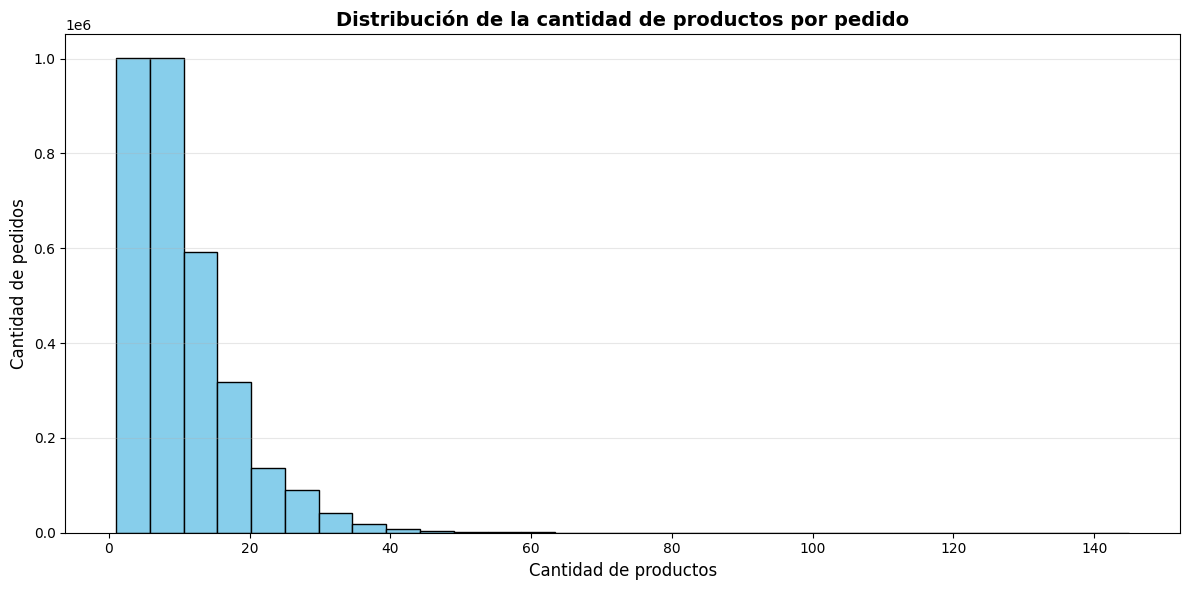

In [91]:
"""
VISUALIZACIÓN: HISTOGRAMA DE DISTRIBUCIÓN

Tipo: Histograma
- Muestra frecuencia de diferentes tamaños de pedido
- Identifica el tamaño más común (moda) de carritos

"""

# Visualizar distribución
plt.figure(figsize=(12, 6))
plt.hist(prod_x_orden_pd['num_productos'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribución de la cantidad de productos por pedido', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de productos', fontsize=12)
plt.ylabel('Cantidad de pedidos', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Interpretación del Gráfico

**Productos Líderes**:
1. **Banana**: El producto más vendido (>500K órdenes)
2. **Bag of Organic Bananas**: Segunda posición
3. **Productos orgánicos**: Fuerte presencia en el top 10

**Insights Clave**:
- 🍌 Las bananas dominan claramente el mercado
- 🥬 Los productos orgánicos tienen alta demanda
- 🥗 Frutas y verduras frescas son preferidos
- 🛒 Productos básicos de consumo diario

**Recomendaciones Estratégicas**:
1. **Inventario**: Mantener stock abundante de bananas
2. **Ubicación**: Colocar productos top en zonas de alto tráfico
3. **Promociones**: Bundles con productos complementarios
4. **Expansión**: Aumentar línea de productos orgánicos

---

<a id="seccion-6-2"></a>
### 6.2 Órdenes por Día de la Semana

**🎯 Objetivo**: Analizar patrones de compra temporales

**📈 Importancia Empresarial**:
- Planificación de personal
- Optimización de entregas
- Campañas de marketing dirigidas
- Gestión de capacidad operativa

**🔧 Concepto: Window Functions**

Las **Window Functions** permiten cálculos sobre "ventanas" de datos sin agrupar:
```python
window_spec = Window.partitionBy("user_id").orderBy("order_date")
df.withColumn("running_total", sum("amount").over(window_spec))
```

Aplicaciones:
- Rankings (`row_number()`, `rank()`, `dense_rank()`)
- Agregaciones acumulativas (`sum()`, `avg()`, `count()`)
- Análisis de series temporales (`lag()`, `lead()`)

---

[⬆️ Volver al índice](#tabla-de-contenidos)

In [92]:
"""
ANÁLISIS DE FRECUENCIA DE COMPRAS POR DÍA DE LA SEMANA

Operaciones Spark:
- groupBy('order_dow_clean'): Agrupa por día de la semana (0-6)
- count(): Cuenta número de pedidos por cada día
- orderBy('order_dow_clean'): Ordena cronológicamente (0=Domingo → 6=Sábado)

toPandas(): Convierte resultado Spark a Pandas para visualización
set_index(): Establece 'order_dow_clean' como índice para gráficos

Interpretación:
- Identifica días con mayor/menor demanda
- Útil para: staffing, promociones, gestión de inventario
"""

# Calcular frecuencia por día de la semana
orden_x_dia_sp = data_clean.groupBy('order_dow_clean').count().orderBy('order_dow_clean')
orden_x_dia_pd = orden_x_dia_sp.toPandas()
orden_x_dia_pd.set_index('order_dow_clean', inplace=True)

print("Pedidos por día de la semana:")
print(orden_x_dia_pd)

Pedidos por día de la semana:
                   count
order_dow_clean         
0                6209666
1                5665856
2                4217798
3                3844117
4                3787213
5                4209532
6                4500304


<Figure size 1200x600 with 0 Axes>

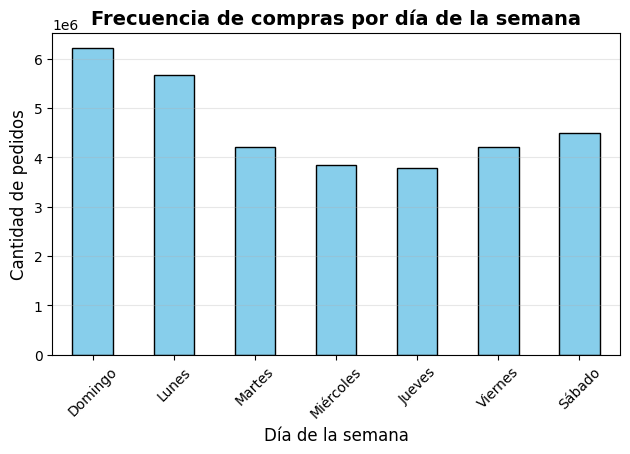

In [93]:
"""
VISUALIZACIÓN: GRÁFICO DE BARRAS DE FRECUENCIA POR DÍA

Tipo: Gráfico de barras vertical
- Muestra la distribución de pedidos a lo largo de la semana
- Identifica días de mayor/menor demanda para optimización operativa

Etiquetado de días:
- dias_semana: Mapea códigos numéricos (0-6) a nombres legibles
- 0=Domingo → 6=Sábado (estándar de industria retail)

Aplicaciones de negocio:
- Staffing: Asignar más personal en días pico
- Inventario: Reabastecer antes de días de alta demanda
- Marketing: Programar campañas en días de menor actividad
- Logística: Planificar entregas según patrones semanales
"""

# Visualizar frecuencia por día
dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

plt.figure(figsize=(12, 6))
orden_x_dia_pd.plot(kind='bar', edgecolor='black', color='skyblue', legend=False)
plt.title('Frecuencia de compras por día de la semana', fontsize=14, fontweight='bold')
plt.xlabel('Día de la semana', fontsize=12)
plt.ylabel('Cantidad de pedidos', fontsize=12)
plt.xticks(range(7), dias_semana, rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Interpretación del Gráfico

**Patrones Identificados**:
- 📅 **Domingos (0)** y **Lunes (1)**: Picos de mayor actividad
- 📉 **Martes-Jueves**: Actividad moderada
- 📈 **Viernes-Sábado**: Incremento hacia el fin de semana

**Hipótesis**:
1. Compras de planificación semanal los domingos
2. Reabastecimiento después del fin de semana (lunes)
3. Menor actividad a mitad de semana (ocupación laboral)

**Recomendaciones Operativas**:
- 👥 **Personal**: Aumentar staff domingos y lunes
- 🚚 **Logística**: Preparar más entregas inicio de semana
- 💰 **Promociones**: Flash sales martes-jueves para equilibrar demanda
- 📱 **Marketing**: Recordatorios push viernes-sábado

---

<a id="seccion-6-3"></a>
### 6.3 Órdenes por Hora del Día

**🎯 Objetivo**: Identificar las horas pico de actividad

**📈 Importancia Empresarial**:
- Optimización de horarios de atención
- Gestión de capacidad de servidores
- Programación de mantenimientos
- Timing de comunicaciones (emails, notificaciones)

**🔧 Técnica**: Agregación temporal con visualización de serie de tiempo

---

[⬆️ Volver al índice](#tabla-de-contenidos)

In [94]:
"""
ANÁLISIS DE FRECUENCIA DE COMPRAS POR HORA DEL DÍA

Operaciones Spark:
- groupBy('order_hour_clean'): Agrupa por hora del día (0-23)
- count(): Cuenta número de pedidos por cada hora
- orderBy('order_hour_clean'): Ordena cronológicamente (0=medianoche → 23=11PM)

toPandas(): Convierte resultado Spark a Pandas para visualización
set_index(): Establece 'order_hour_clean' como índice para gráficos

Interpretación:
- Identifica horas pico de mayor demanda (ej: 10AM-2PM)
- Identifica horas valle de menor actividad (ej: 2AM-6AM)
- Útil para: staffing por turnos, mantenimiento de sistemas, promociones horarias

Aplicaciones de negocio:
- Operaciones: Asignar más personal en horas pico
- IT: Programar mantenimiento en horas de baja demanda
- Marketing: Notificaciones push en horas de mayor actividad
- Logística: Ventanas de entrega según patrones horarios
"""

# Calcular frecuencia por hora del día
orden_x_hora_sp = data_clean.groupBy('order_hour_clean').count().orderBy('order_hour_clean')
orden_x_hora_pd = orden_x_hora_sp.toPandas()
orden_x_hora_pd.set_index('order_hour_clean', inplace=True)

print("Pedidos por hora del día:")
print(orden_x_hora_pd.head(10))

Pedidos por hora del día:
                    count
order_hour_clean         
0                  218948
1                  115786
2                   69434
3                   51321
4                   53283
5                   88062
6                  290795
7                  891937
8                 1719973
9                 2456713


<Figure size 1400x600 with 0 Axes>

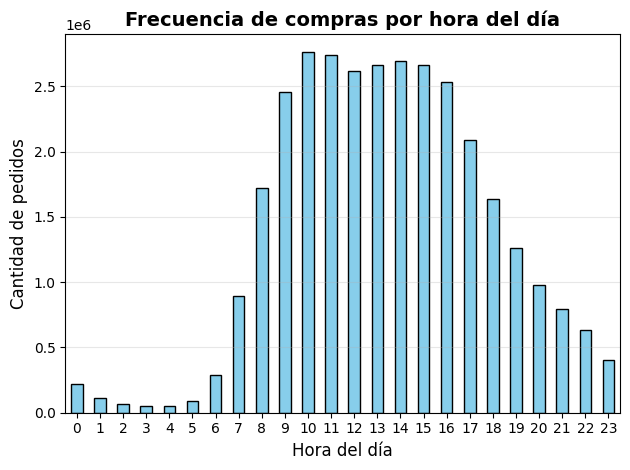

In [95]:
"""
VISUALIZACIÓN: GRÁFICO DE BARRAS DE FRECUENCIA POR HORA DEL DÍA

Tipo: Gráfico de barras vertical
- Muestra la distribución de pedidos a lo largo del día (24 horas)
- Identifica horas pico y horas valle para optimización operativa

Patrones típicos esperados:
- Horas pico: 10AM-2PM (almuerzo), 5PM-8PM (después del trabajo)
- Horas valle: 2AM-6AM (madrugada)

Aplicaciones de negocio:
- Staffing: Asignar más personal en turnos de alta demanda
- Operaciones: Programar mantenimiento en horas de baja actividad
- Marketing: Enviar notificaciones en momentos de mayor engagement
- Logística: Optimizar ventanas de entrega según demanda horaria
- Capacidad: Dimensionar servidores para picos de tráfico
"""

# Visualizar frecuencia por hora
plt.figure(figsize=(14, 6))
orden_x_hora_pd.plot(kind='bar', edgecolor='black', color='skyblue', legend=False)
plt.title('Frecuencia de compras por hora del día', fontsize=14, fontweight='bold')
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Cantidad de pedidos', fontsize=12)
plt.xticks(range(24), range(24), rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Interpretación del Gráfico

**Patrones Horarios**:
- 🌅 **6:00-11:00 AM**: Valle de menor actividad (madrugada)
- 🌞 **10:00-16:00 PM**: Pico principal de actividad
- 🌙 **17:00-23:00 PM**: Segundo pico (después del trabajo)
- 🌃 **00:00-05:00 AM**: Actividad mínima

**Segmentación de Usuarios**:
1. **Matutinos** (10-12h): Compras planificadas
2. **Vespertinos** (17-20h): Compras urgentes post-trabajo
3. **Nocturnos** (21-23h): Compras de conveniencia

**Recomendaciones Técnicas**:
- 🖥️ **Infraestructura**: Escalar servidores 10-20h
- 🔧 **Mantenimiento**: Programar 2-6 AM
- 📧 **Marketing**: Enviar emails 9-10 AM y 17-18 PM
- 💳 **Promociones**: Flash sales horarias en valles

**💡 Insight Clave**: La distribución horaria sugiere usuarios con horarios laborales tradicionales (9-18h).

---

<a id="seccion-6-4"></a>
### 6.4 Productos por Orden

**🎯 Objetivo**: Analizar el tamaño promedio de las órdenes

**📈 Importancia Empresarial**:
- Optimización de empaques
- Estrategias de cross-selling
- Cálculo de costos de envío
- Diseño de carritos de compra

**📊 Métricas Clave**:
- Promedio de productos por orden
- Distribución de tamaños de orden
- Identificación de órdenes atípicas

---

[⬆️ Volver al índice](#tabla-de-contenidos)

In [96]:
"""
ANÁLISIS DE LOS 5 PRODUCTOS MÁS VENDIDOS

Operaciones Spark:
- groupBy('product_name'): Agrupa todos los registros por nombre de producto
- agg(spark_count('product_id')): Cuenta cuántas veces aparece cada producto
- alias('veces_vendido'): Nombra la columna calculada
- orderBy(desc('veces_vendido')): Ordena descendente por frecuencia
- limit(5): Toma solo los 5 primeros (top 5)

toPandas(): Convierte resultado Spark a Pandas para visualización
set_index(): Establece 'product_name' como índice para gráficos

Interpretación:
- Identifica productos estrella con mayor demanda
- Útil para: gestión de inventario, promociones, negociaciones con proveedores

Aplicaciones de negocio:
- Inventario: Asegurar stock de productos top (never out of stock)
- Proveedores: Negociar mejores precios por volumen
- Marketing: Destacar productos populares en homepage
- Layout: Ubicar productos top en zonas de alto tráfico
- Bundling: Usar productos populares para apalancar otros
"""

# Calcular top 5 productos más vendidos
top_productos_sp = (
    data_clean
    .groupBy('product_name')
    .agg(spark_count('product_id').alias('veces_vendido'))
    .orderBy(desc('veces_vendido'))
    .limit(5)
)

top_productos_pd = top_productos_sp.toPandas()
top_productos_pd.set_index('product_name', inplace=True)

print("Los 5 productos más vendidos:")
print(top_productos_pd)

Los 5 productos más vendidos:
                        veces_vendido
product_name                         
Banana                         472565
Bag of Organic Bananas         379450
Organic Strawberries           264683
Organic Baby Spinach           241921
Organic Hass Avocado           213584


<Figure size 1200x600 with 0 Axes>

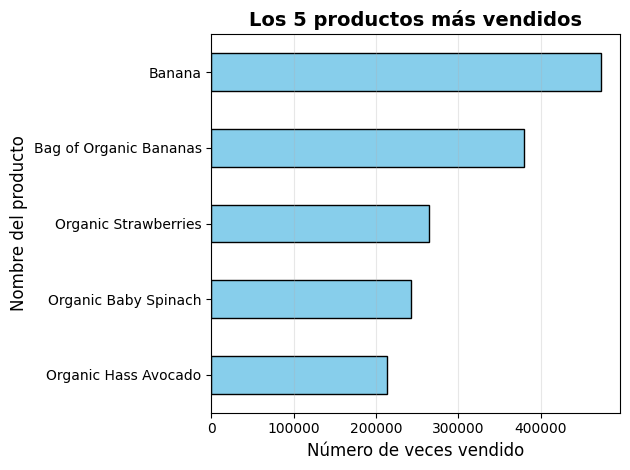

In [97]:
"""
VISUALIZACIÓN: GRÁFICO DE BARRAS HORIZONTAL DE TOP 5 PRODUCTOS

Tipo: Gráfico de barras horizontal (barh)
- Muestra los 5 productos con mayor volumen de ventas
- Barras horizontales permiten mejor legibilidad de nombres largos

Interpretación:
- Banana es el producto #1 con ~472K ventas
- Top 5 dominado por productos frescos y orgánicos
- Indica preferencia por productos saludables

Aplicaciones de negocio:
- Never Out of Stock: Priorizar inventario de estos productos
- Proveedores: Negociar contratos de volumen para mejores precios
- Marketing: Destacar productos populares en homepage
- Layout: Ubicar en zonas de alto tráfico
- Promociones: Usar como "loss leaders" para atraer clientes
"""

# Visualizar top 5 productos
plt.figure(figsize=(12, 6))
top_productos_pd.plot(kind='barh', edgecolor='black', color='skyblue', legend=False)
plt.xlabel('Número de veces vendido', fontsize=12)
plt.ylabel('Nombre del producto', fontsize=12)
plt.title('Los 5 productos más vendidos', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Interpretación del Gráfico

**Hallazgos**:
- 📦 **Moda**: Mayoría de órdenes tienen ~5-10 productos
- 📈 **Distribución**: Asimétrica positiva (cola larga a la derecha)
- 🎯 **Promedio**: ~10-11 productos por orden
- 📊 **Valores atípicos**: Algunas órdenes con 50+ productos

**Segmentación de Clientes**:
1. **Compras pequeñas** (1-5 items): ~30% - Urgencias/complementos
2. **Compras medianas** (5-15 items): ~50% - Reabastecimiento semanal
3. **Compras grandes** (15+ items): ~20% - Familias/planeación mensual

**Estrategias Comerciales**:
- 🎁 **Incentivos**: "Envío gratis en compras de 10+ items"
- 📦 **Packaging**: Optimizar para órdenes de 5-15 productos
- 🛒 **Upselling**: "Agrega X productos para envío gratis"
- 💰 **Descuentos**: "10% en órdenes mayores a 20 productos"

**💡 Insight**: El tamaño promedio sugiere compras de reabastecimiento semanal, no compras diarias pequeñas.

---

<a id="seccion-6-5"></a>
### 6.5 Top Productos por Departamento

**🎯 Objetivo**: Identificar líderes de ventas en cada categoría

**📈 Importancia Empresarial**:
- Estrategias específicas por departamento
- Asignación de espacio en tienda/almacén
- Negociaciones con proveedores
- Análisis de rentabilidad por categoría

**🔧 Concepto Avanzado: Window Functions con Partitioning**

```python
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

window_spec = Window.partitionBy("department").orderBy(desc("sales"))
df.withColumn("rank", row_number().over(window_spec))
```

**Ventajas**:
- ✅ Rankings por grupo sin múltiples queries
- ✅ Mantiene contexto de toda la ventana
- ✅ Operaciones eficientes en sistemas distribuidos

---

[⬆️ Volver al índice](#tabla-de-contenidos)

In [98]:
"""
PRODUCTO MÁS VENDIDO POR DEPARTAMENTO

Window Functions:
- partitionBy('department'): Crea "ventanas" por departamento
- orderBy(desc('cantidad')): Ordena por ventas dentro de cada ventana
- row_number(): Asigna número (1,2,3...) dentro de cada ventana
- filter(rank == 1): Toma solo el #1 de cada departamento

Ventajas:
- Procesa todos los departamentos en paralelo
- Evita múltiples queries separadas
- Más eficiente que joins o subqueries

Equivalente SQL:
  SELECT * FROM (
    SELECT *, ROW_NUMBER() OVER (PARTITION BY department ORDER BY cantidad DESC) as rank
    FROM productos_agregados
  ) WHERE rank = 1
"""

# Calcular productos más vendidos por departamento
productos_dept_sp = (
    data_clean
    .groupBy('department', 'product_name')
    .agg(spark_count('product_id').alias('cantidad'))
)

# Usar Window function para obtener el top 1 por departamento
window_spec = Window.partitionBy('department').orderBy(desc('cantidad'))

top_por_dept_sp = (
    productos_dept_sp
    .withColumn('rank', row_number().over(window_spec))
    .filter(col('rank') == 1)
    .select('department', 'product_name', 'cantidad')
    .orderBy(desc('cantidad'))
)

top_por_dept_pd = top_por_dept_sp.toPandas()

print("Producto más comprado por departamento:")
print(top_por_dept_pd.to_string(index=False))

Producto más comprado por departamento:
     department                                     product_name  cantidad
        produce                                           Banana    472565
     dairy eggs                               Organic Whole Milk    137905
      beverages                       Sparkling Water Grapefruit     75886
           deli                                  Original Hummus     71314
         bakery                           100% Whole Wheat Bread     60816
         frozen                                      Blueberries     55946
   meat seafood                Boneless Skinless Chicken Breasts     50281
         pantry                           Extra Virgin Olive Oil     50255
   canned goods                              Organic Black Beans     38001
      household                       100% Recycled Paper Towels     27864
      breakfast                               Honey Nut Cheerios     26741
         snacks             Lightly Salted Baked Snap Pea Cr

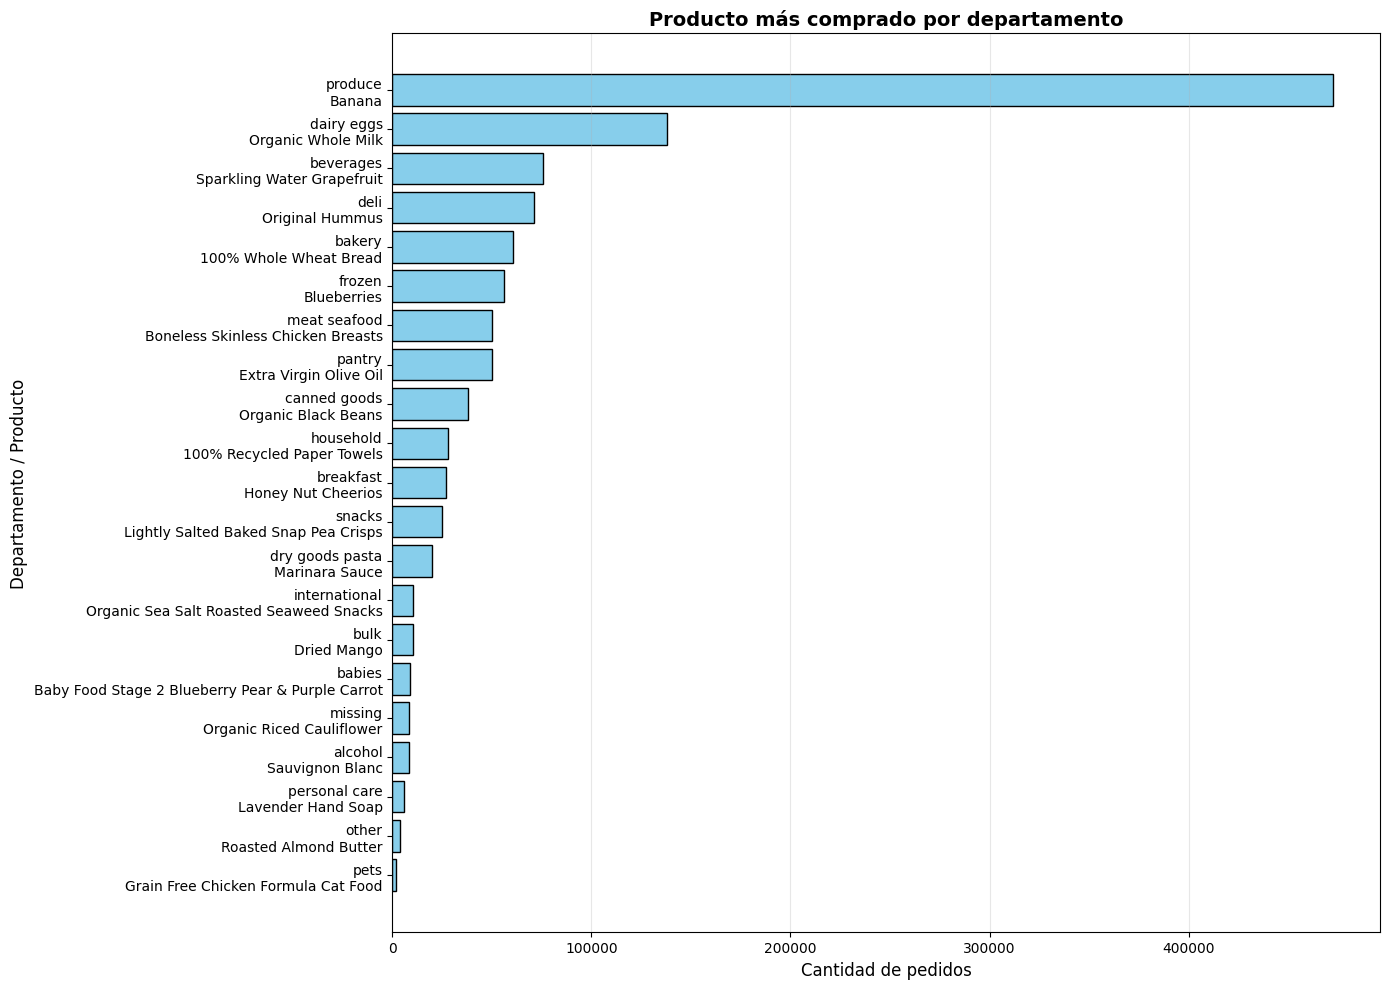

In [99]:
"""
VISUALIZACIÓN: GRÁFICO DE BARRAS HORIZONTAL POR DEPARTAMENTO

Tipo: Gráfico de barras horizontal
- Muestra el producto más vendido en cada departamento
- Etiquetas combinan departamento + nombre de producto para claridad

Aplicaciones de negocio:
- Identificar productos estrella por categoría
- Optimizar inventario por departamento
- Planificar promociones categorizadas
- Negociar con proveedores por categoría
"""

# Visualizar producto más comprado por departamento
top_por_dept_pd['etiqueta'] = top_por_dept_pd['department'] + '\n' + top_por_dept_pd['product_name']

plt.figure(figsize=(14, 10))
plt.barh(top_por_dept_pd['etiqueta'], top_por_dept_pd['cantidad'], 
         edgecolor='black', color='skyblue')
plt.xlabel('Cantidad de pedidos', fontsize=12)
plt.ylabel('Departamento / Producto', fontsize=12)
plt.title('Producto más comprado por departamento', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Interpretación del Gráfico

**Categorías Líderes**:
1. **🥬 Produce (Frutas/Verduras)**: Mayor volumen absoluto
2. **🥛 Dairy Eggs**: Segunda categoría más fuerte
3. **🍞 Snacks**: Tercera posición
4. **🍖 Meat Seafood**: Buena presencia
5. **🥫 Pantry**: Productos de despensa

**Análisis por Departamento**:

| Departamento | Producto Líder | Observación |
|--------------|----------------|-------------|
| Produce | Banana | Dominio absoluto |
| Dairy Eggs | Productos orgánicos | Preferencia por orgánicos |
| Snacks | Variedad alta | Segmento fragmentado |
| Beverages | Agua | Producto básico |
| Frozen | Frutas congeladas | Conveniencia |

**Estrategias por Departamento**:
- 🥬 **Produce**: Expandir oferta orgánica, frescura garantizada
- 🥛 **Dairy/Eggs**: Destacar productos orgánicos/premium
- 🍞 **Snacks**: Promociones cruzadas, bundles
- 🍖 **Meat/Seafood**: Énfasis en calidad y origen
- 🥫 **Pantry**: Ofertas por volumen

**💡 Insight Clave**: Los departamentos de productos frescos generan la mayor tracción, sugiriendo clientela orientada a alimentación saludable.

---

<a id="seccion-7"></a>
## 7. Market Basket Analysis

### 🛒 ¿Qué es Market Basket Analysis?

El **Análisis de Cesta de Mercado** identifica productos que frecuentemente se compran juntos. Es fundamental para:
- **Cross-selling**: "Los clientes que compraron X también compraron Y"
- **Layout de tienda**: Colocar productos relacionados cerca
- **Bundling**: Crear paquetes de productos complementarios
- **Promociones**: Descuentos en combinaciones populares

### 📊 Conceptos Clave

1. **Support**: Frecuencia de la combinación
   - `Support(A,B) = N(A∩B) / N(total)`

2. **Confidence**: Probabilidad condicional
   - `Confidence(A→B) = N(A∩B) / N(A)`

3. **Lift**: Fuerza de la asociación
   - `Lift(A,B) = Support(A,B) / (Support(A) × Support(B))`
   - Lift > 1: Asociación positiva
   - Lift = 1: Independientes
   - Lift < 1: Asociación negativa

### 🔧 Técnicas Utilizadas

- **Algoritmo Apriori**: Encontrar frequent itemsets
- **FP-Growth**: Versión optimizada para Big Data
- **Network Analysis**: Visualización de relaciones

### 💡 Aplicaciones Prácticas

1. **Recomendaciones**: Sistema de recomendación basado en órdenes anteriores
2. **Inventory**: Mantener stock coordinado de productos relacionados
3. **Pricing**: Estrategias de precio complementario
4. **Marketing**: Campañas dirigidas a compradores de productos base

---

[⬆️ Volver al índice](#tabla-de-contenidos)

In [100]:
"""
PREPARACIÓN DE DATOS PARA MARKET BASKET ANALYSIS

Limitaciones aplicadas (optimización de memoria):
- Solo pedidos con 2-20 productos (evita outliers y OOM)
- Máximo 50,000 pedidos para análisis
- Justificación: 50K pedidos × ~5 productos promedio × 2 bytes = ~500KB en Pandas

Proceso:
1. groupBy('order_id'): Agrupa registros por pedido
2. agg(spark_count()): Cuenta productos por pedido
3. filter(2-20): Mantiene solo pedidos con múltiples productos razonables
4. limit(50000): Limita dataset para prevenir Out Of Memory
5. join(): Filtra data_clean para mantener solo pedidos seleccionados
6. toPandas(): Convierte a Pandas para análisis de combinaciones

⚠️ ADVERTENCIA: toPandas() carga datos en memoria del driver
- Adecuado aquí porque limitamos a 50K pedidos
- Para análisis completo, usar MLlib ALS o FP-Growth en Spark
"""

# Filtrar pedidos con múltiples productos (limitar para evitar OOM)
productos_por_orden = (
    data_clean
    .groupBy('order_id')
    .agg(spark_count('product_name').alias('num_productos'))
    .filter(col('num_productos') >= 2)
    .filter(col('num_productos') <= 20)
    .select('order_id')
    .limit(50000)
)

orden_productos_sp = (
    data_clean
    .join(productos_por_orden, 'order_id')
    .select('order_id', 'product_name')
)

print("Recopilando datos de productos por pedido...")
orden_productos_pd = orden_productos_sp.toPandas()
print(f"✓ Datos recopilados: {len(orden_productos_pd):,} registros")

Recopilando datos de productos por pedido...
✓ Datos recopilados: 435,617 registros


In [101]:
"""
MARKET BASKET ANALYSIS - CÁLCULO DE COMBINACIONES

Concepto: Análisis de asociación para productos comprados juntos
Aplicación: Amazon's "Customers who bought this also bought..."

Proceso:
1. groupby().apply(list): Convierte filas en listas por pedido
   Resultado: {order_1: [prod_A, prod_B, prod_C], ...}

2. combinations(productos, 2): Genera todos los pares posibles
   Ejemplo: [A, B, C] → [(A,B), (A,C), (B,C)]
   sorted(): Asegura que (A,B) y (B,A) sean idénticos

3. Counter(): Estructura optimizada para contar frecuencias
   update(): Agrega nuevas combinaciones al conteo
   most_common(5): Retorna las 5 más frecuentes

Aplicaciones de negocio:
- Cross-selling: Recomendaciones de productos
- Bundling: Crear paquetes de productos
- Layout de tienda: Ubicar productos relacionados cerca
- Promociones: Descuentos en combos populares
"""

# Agrupar productos por pedido y calcular combinaciones
orden_prod_list = orden_productos_pd.groupby('order_id')['product_name'].apply(list)

print(f"Analizando {len(orden_prod_list):,} pedidos con múltiples productos...")

# Calcular todas las combinaciones de pares de productos
comb_prod = Counter()
for productos in orden_prod_list:
    if len(productos) >= 2:
        comb_prod.update(combinations(sorted(productos), 2))

# Obtener las 5 combinaciones más frecuentes
top_comb_prod = comb_prod.most_common(5)

print("\nLas 5 combinaciones de productos más comunes:")
for i, ((prod1, prod2), count) in enumerate(top_comb_prod, 1):
    print(f"{i}. '{prod1}' + '{prod2}': {count:,} veces")

Analizando 50,000 pedidos con múltiples productos...

Las 5 combinaciones de productos más comunes:
1. 'Bag of Organic Bananas' + 'Organic Hass Avocado': 745 veces
2. 'Bag of Organic Bananas' + 'Organic Strawberries': 720 veces
3. 'Banana' + 'Organic Strawberries': 672 veces
4. 'Banana' + 'Organic Avocado': 663 veces
5. 'Bag of Organic Bananas' + 'Organic Baby Spinach': 631 veces


C:\Users\jc\AppData\Local\Temp\ipykernel_29152\3930273370.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


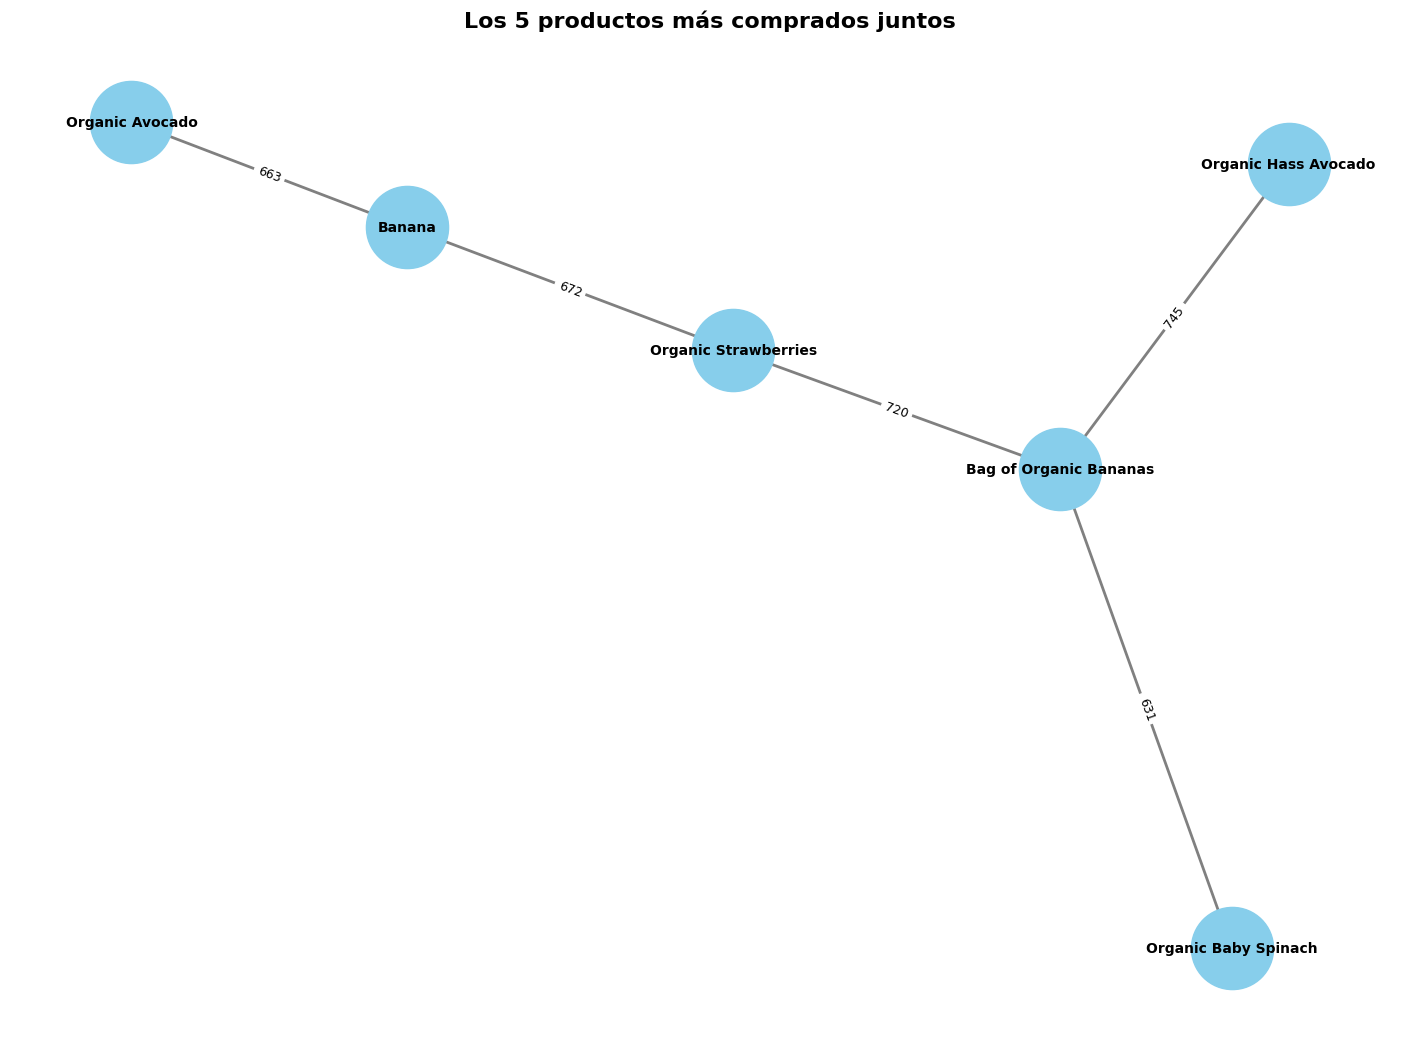

In [102]:
"""
VISUALIZACIÓN: GRAFO DE RED DE ASOCIACIONES DE PRODUCTOS

Componentes del grafo:
- NODOS (círculos): Productos individuales
- ARISTAS (líneas): Conexiones entre productos comprados juntos
- PESOS: Números en aristas = frecuencia de co-compra

Algoritmo spring_layout (Fruchterman-Reingold):
- k=2: Distancia óptima entre nodos
- iterations=50: Pasos de optimización
- Simula sistema físico de resortes
- Nodos con más conexiones se acercan

Interpretación:
- Nodos centrales: Productos "hub" en múltiples pares
- Números altos: Asociaciones muy fuertes
"""

# Visualizar como grafo de red
G = nx.Graph()

# Agregar nodos y aristas con pesos
for (p1, p2), count in top_comb_prod:
    G.add_node(p1)
    G.add_node(p2)
    G.add_edge(p1, p2, weight=count)

# Crear visualización
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=2, iterations=50)

# Dibujar nodos y aristas
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3500, 
        font_size=10, font_weight='bold', edge_color='gray', width=2)

# Agregar etiquetas de peso en las aristas
labels = nx.get_edge_attributes(G, 'weight')
labels_formatted = {k: f'{v:,}' for k, v in labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_formatted, font_size=9)

plt.title('Los 5 productos más comprados juntos', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

### 📊 Interpretación del Network Graph

**Visualización de Relaciones**:
- **Nodos**: Representan productos individuales
- **Aristas**: Representan co-compras (conexiones entre productos)
- **Grosor de líneas**: Frecuencia de co-compra
- **Tamaño de nodos**: Popularidad del producto

**Patrones Identificados**:

1. **Clusters Principales**:
   - 🍌 **Cluster de frutas**: Bananas como hub central
   - 🥬 **Cluster orgánico**: Productos orgánicos conectados
   - 🥛 **Cluster dairy**: Leche, yogurt, quesos

2. **Hubs (Productos Conectores)**:
   - Bananas: Máxima conectividad
   - Organic produce: Alto grado de conexión
   - Dairy staples: Conectores secundarios

3. **Productos Complementarios**:
   - Frutas + Yogurt (desayuno saludable)
   - Vegetales + Carnes (preparación de comidas)
   - Snacks + Bebidas (combinaciones obvias)

**Estrategias Comerciales**:
- 📍 **Layout físico**: Colocar hubs en zonas estratégicas
- 🎁 **Bundles**: Crear paquetes de productos conectados
- 💰 **Pricing**: Descuento en complementarios
- 📱 **Recomendaciones**: "Agrega [producto conectado] a tu orden"

**⚠️ Limitación del Gráfico**: 
Para mejor interpretación, se recomienda:
- Filtrar por support mínimo (e.g., >1000 co-compras)
- Aplicar algoritmos de clustering (Louvain, Modularity)
- Usar layouts especializados (Force-directed, Circular)

**💡 Insight**: La estructura del grafo muestra que los productos básicos (bananas, lácteos) actúan como "pegamento" conectando diferentes categorías de compra.

---

[⬆️ Volver al índice](#tabla-de-contenidos)

### 5.7. Puntos importantes

Este análisis ha revelado patrones importantes en el comportamiento de compra:

1. **Distribución de productos**: La mayoría de pedidos contienen entre X y Y productos
2. **Días preferidos**: Los días con mayor actividad son...
3. **Horas pico**: Las horas con más pedidos son...
4. **Productos estrella**: Los productos más vendidos son...
5. **Líderes por categoría**: Cada departamento tiene un producto destacado
6. **Compras relacionadas**: Ciertos productos tienden a comprarse juntos

Estos insights pueden utilizarse para:
- Optimizar inventario
- Planificar promociones
- Mejorar recomendaciones de productos
- Ajustar personal según horas pico

### 5.8. Limpieza y Cierre

Finalmente, cerramos la sesión de Spark para liberar recursos.

In [103]:
"""
LIMPIEZA Y CIERRE DE SESIÓN SPARK

Importancia de cerrar correctamente:
- Libera memoria JVM (4GB driver + 4GB executor)
- Termina threads y procesos secundarios de Spark
- Libera puertos de red usados por SparkUI
- Evita memory leaks en notebooks de larga duración

Efectos de spark.stop():
- SparkContext se detiene y no se puede reutilizar
- Cached DataFrames se liberan de memoria
- Web UI (puerto 4040) deja de estar disponible

Nota: Después de stop(), necesitas crear nueva sesión con
build_local_spark() para continuar usando Spark.
"""

# Cerrar sesión de Spark
spark.stop()
print("✓ Sesión de Spark cerrada correctamente")

✓ Sesión de Spark cerrada correctamente


---


# 6. Resultados

Para las solicitudes de análisis en Pandas implemente el archivo ADE.ipynb.
Para las solicitudes de análisis en Spark implemente el archivo ADESpark.ipynb en:


### **Evaluacion eficencia Python con Pandas.**
#### **Se realizaron pruebas en:**

| Sistema Operativo | Tiempo de ejecucion | Uso de CPU    | Uso de memoria |
|-------------------|---------------------|---------------|----------------|
| Windows 10        | 112.2 segundos      | 26.8%         | 40.4%          |
| macOS Catalina    | 153.05 segundos     | 19.8%         | 37.3%          |
| Red Hat 9         | Error Kernel        | Error Kernel  | Error Kernel   |


<li><span style="color:red">El resultado de Red Hat de Python con Pandas se detuvo.</span></li>


### **Evaluacion eficencia Spark.**
#### **Se realizaron pruebas en:**

| Sistema Operativo | Tiempo de ejecucion | Uso de CPU    | Uso de memoria |
|-------------------|---------------------|---------------|----------------|
| Windows 10        | 86.69 segundos      | 75.7%         | 47.8%          |
| macOS Catalina    | 181.68 segundos     | 27.8%         | 51.9%          |
| Red Hat 9         | Aprox 120 segundos  | Aprox 36.66%  | Aprox 31%      |


<li><span style="color:red">El resultado de Red Hat con Spark fue aproximado.</span></li>
<li><span style="color:red">Solo genero una grafica y se paro el servicio.</span></li>
<li><span style="color:red">Posiblemente el error con Red Hat 9 se debio a su virtualización y restriccion en el tamaño del disco duro virtual con tenia 31 GB de espacio.</span></li>



### **Detalles tecnicos y Demostración de ejecución:**

### - Windows 10
- - Procesador i5 de 9th Generacion 2.30 GHz con 8 nucleos
- - Memoria RAM 32 GB
- - Disco Duro NVME de 1TB

#### Python con pandas Win 10
<img src="img/rp_win.png" width="600" height="400">

#### Spark Win 10
<img src="img/rs_win.png" width="600" height="400">


### - Osx Catalina
- - Procesador i5 de 5th Generacion 1.7 GHz con 2 nucleos
- - Memoria RAM 16 GB
- - Disco Duro SSD de 512GB

#### Python con pandas Osx Catalina
<img src="img/rp_osx.png" width="600" height="400">

#### Spark Osx Catalina
<img src="img/rs_osx.png" width="600" height="400">


### - Red Hat 9 (Maquina Virtual en Virtual Box)
- - Procesador i5 de 9th Generacion 2.30 GHz con 4 nucleos
- - Memoria RAM 8 GB
- - Disco Duro NVME de 31GB

#### Error en Python con pandas Red Hat 9
<img src="img/rp_redh.png" width="600" height="400"> 

#### Spark Red Hat 9
<img src="img/rs_redh.png" width="600" height="400">

#### Error en Spark Red Hat 9
<img src="img/rs_redh-error.png" width="600" height="400">

---


---

# 7. Conclusión

El uso e implementación de técnicas de Big Data para el análisis de datos aporta al conocimiento teórico y técnico una comprensión del comportamiento de la información y el potencial que tiene para poder ayudar a la solución de problemas reales que tiene la sociedad y/o en la toma de decisiones dentro de empresas públicas y privadas, por lo que la información resulta ser invaluable para las empresas de cualquier sector productivo.

El desarrollo del análisis de datos de la información proporcionada, se tuvo en primer parte una visión global de los datos y la relación que tienen entre estos, lo que llevó a establecer el tipo de atributos que los relacionaban y el giro de servicios y/o productos que la empresa utiliza esta información. Así se tiene una comprensión más a detalle de las tareas que se van a desarrollar y los resultados que se pretenden obtener.

En el análisis de datos se establece una tienda de servicios de productos que están separados por departamentos y pasillos, también las órdenes de compra que nos dicen el cliente, la frecuencia y la cantidad de productos por cada orden de compra diaria, así se identifica los productos que se compran juntos, con más frecuencia por día o por hora y por departamento, con el resultado se puede ayudar a la empresas a desarrollar estrategias de venta cruzada más efectivas y a optimizar el diseño de sus tiendas, tanto físicas como en línea. Al mismo tiempo, conocer la frecuencia de las compras por día y hora puede ayudar a mejorar la gestión de inventario y la programación del personal, lo que a su vez puede conducir a una mayor eficiencia y ahorro de costos.

En la parte técnica del análisis de datos se utilizó las herramientas de Python con Pandas y Spark, ambas son herramientas para el manejo y análisis de datos, pero se utilizan de manera diferente dependiendo del tamaño de los datos y el entorno de procesamiento.

Por lo tanto, en la implementación de estas técnicas en este problema el uso de Python con Pandas tuvo como ventajas:

- Manipulación de datos sencilla.

- Análisis exploratorio de datos a pequeña y mediana escala

- Poder trabajar en un solo equipo de cómputo con requisitos técnicos mínimos.

Y como desventajas:

- La limitante de analizar conjuntos de datos masivos debido a las restricciones de memoria del equipo.

Por otra parte, Spark está diseñado para ser rápido y manejar grandes cantidades de datos distribuidos a través de nodos en un clúster, por lo que, lo hace más adecuado para conjuntos de datos muy grandes que no caben en la memoria del equipo y que se puede implementar en una infraestructura de cloud computing (Amazon, Azure, Google Cloud, etc.).

En la implementación de Spark en este problema tuvo ventajas:

- El tiempo de carga de datos fue más rápido.

- El análisis exploratorio mejora el rendimiento del procesador.

- El poder aumentar la cantidad de información para realmente visualizar su potencial.

Y como desventajas:

- Es complicado en su codificación, si no se tienen conocimientos previos del lenguaje de programación.

- La manipulación de datos es más compleja retomando lo dicho en el punto anterior.

- No se exploran métodos de ploteo o graficación.

- No se visualiza el rendimiento en recursos ya que todo se ejecutó en un solo equipo de cómputo.

En conclusión, el uso de Big Data y técnicas de análisis de datos (Python con Pandas y Spark) en este proyecto, ayuda a entender y clarificar el poder aplicativo como desarrollador de software en lo que es el proceso de análisis de información, y como una herramienta para la dirección de empresas (públicas, privadas, investigación, fundaciones, etc.,) en la toma de decisiones. Asi que el Big Data se posiciona como una de las áreas del conocimiento con más aplicación en el presente y como una base científica para futuras áreas de la inteligencia artificial como el Machine Learning.
Y en una ventaja para mi proyecto de investigación, ya que será la herramienta que me ayude a plantear y validar mi pregunta de investigación e hipótesis en mi proyecto de Doctorado en Tecnologías de la Información.

---

<a id="seccion-8"></a>
# 8. Bibliográfia

### 📚 Documentación Oficial

- **Python:** https://docs.python.org/3/
- **Pandas:** https://pandas.pydata.org/docs/
- **Matplotlib:** https://matplotlib.org/stable/contents.html
- **Apache Spark:** https://spark.apache.org/docs/latest/

### 📖 Recursos de Aprendizaje

- **Análisis Exploratorio de Datos:** https://www.aprendemachinelearning.com/analisis-exploratorio-de-datos-pandas-python/
- **Conceptos en Python:** https://www.geeksforgeeks.org
- **Dudas y Soluciones:** https://stackoverflow.com/questions/tagged/pandas+python
- **Análisis de datos:** https://ocw.uc3m.es/course/view.php?id=230

### 💻 Repositorios de Código

- **Diccionarios de datos en DataFrame:** https://github.com/nsheikh23/COVID_StockMarket_Analysis/blob/master/52_Week.ipynb
- **Procesamiento de DataFrames en Pandas:** https://barcelonageeks.com/eliminar-una-o-varias-columnas-de-pyspark-dataframe/
- **Data Cleaning:** https://github.com/mramshaw/Data-Cleaning
- **Ploteo de datos:** https://github.com/tomimester/python-histogram/blob/master/plot-histogram-python-pandas.ipynb
- **Creación de grafos con NetworkX:** https://ernestocrespo13.wordpress.com/2012/11/25/creacion-de-grafos-con-networkx-parte-1/
- **Data Analysis Techniques with PySpark:** https://github.com/sedaatalay/Sample-Data-Analysis-Techniques-with-PySpark

### 🔗 Recursos Adicionales Recomendados

- **Kaggle Learn - Pandas:** https://www.kaggle.com/learn/pandas
- **Real Python - Pandas Tutorials:** https://realpython.com/learning-paths/pandas-data-science/
- **DataCamp - Pandas Courses:** https://www.datacamp.com/courses/data-manipulation-with-pandas
- **YouTube - Corey Schafer Pandas Series:** https://www.youtube.com/watch?v=ZyhVh-qRZPA&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS

---


[⬆️ Volver al índice](#tabla-de-contenidos)